## Stats701-001 Homework 9: MapReduce, Hadoop and Spark
### Taylor Spooner
#### spoonert@umich.edu

**Collaboration**: I went to Keith's office hours to sort out bug in part two. 

**Time**: Problem 1: 35 minutes, Problem 2: 90 minutes (I got stuck on a bug), Problem 3: 60 minutes.

# 1 Warmup: counting words with `mrjob`

The script to count the words was written outside of jupyter. It is called `spoonert.hw9.1.py` and is attached in the submitted file. For problem 1 we decided to keep apostrophed words together. However, any other sort of punctuation (including hyphenated words) were split into seperate words. The files `simple_word_counts.txt` and `word_counts.txt` contain the results from parts 2 and 3 and are also attached.

I was not sure if I should include numbers or not in my search for words. I took them out because I guess they aren't really words. If I was supposed to keep them in, I would have ran the exact same commands but just have a different regular expression. Instead of just `[a-zA-Z_\']+` I could use `[\w]+` or something like that.

**Problem 1:** File atttached as `spoonert.hw9.1.py`.

**Problem 2:** The following command was used to run the script on my local machine:

**Problem 3:** The following commands were used to run the script on the hadoop cluster.

**Problem 4: Using the information in `word_counts.txt`, make a plot of word frequency as a function of word rank on a log-log scale for all words in the file `moby_dick.txt`.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

Read in the data from `word_counts.txt`.

In [2]:
dat = pd.read_table("word_counts.txt", header=None)
dat.rename(index=str, columns={0: "word", 1: "freq"}, inplace=True)

In [3]:
dat.head()

,word,freq
0,a,4807
1,aback,2
2,abaft,2
3,abandon,3
4,abandoned,7


In [4]:
dat['rank'] = dat['freq'].rank(ascending=False)

In [5]:
dat.sort_values('rank').head()

,word,freq,rank
15023,the,14711,1.0
10165,of,6739,2.0
497,and,6516,3.0
0,a,4807,4.0
15254,to,4707,5.0


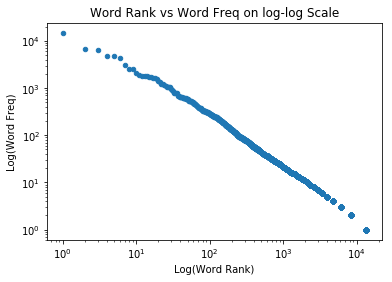

In [6]:
p = dat.plot('rank', 'freq', kind='scatter', loglog=True, title="Word Rank vs Word Freq on log-log Scale")
p.set_xlabel('Log(Word Rank)')
p.set_ylabel('Log(Word Freq)')
plt.show()

Wow! It works! To be honest I was a little skeptical that this would look so linear. This is a negatively sloping linear line. The upper tail looks to deviate from the rest of the line a little but not by much.

# 2. Computing Sample Statistics with `mrjob`

**Problem 1:** For the first problem, we wrote the script outside of jupyter and is attached. For the variance formula we are using $n$ instead of $n-1$.  
**Problem 2:** The output file is also attached. To run the file on my local machine the following command was used:

**Problem 3:** The following code was used to run the shell commands. The output file is included in submission.

**Problem 4:** Plot 95% confidence intervals for the sample means of the populations given by the class labels.

In [2]:
import ast

In [9]:
d = pd.read_table("summary_large.txt", header=None)
d.rename(columns={0: "key", 1: 'list'}, inplace = True)

In [10]:
# Convert each row from a string to a list
d['list2'] = [ast.literal_eval(x) for x in d['list']]

In [11]:
d[['n', 'mean', 'var']] = pd.DataFrame(d.list2.values.tolist(), index= d.index)

In [26]:
#del d['list']
d['sd'] = np.sqrt(d['var']/d['n'])
d['lower'] = d['mean'] - 1.96*d['sd']
d['upper'] = d['mean'] + 1.96*d['sd']

In [27]:
d.head()

,key,list,list2,n,mean,var,sd,lower,upper
0,0,"[834237.0, 11.562434283892557, 87499013.8387025]","[834237.0, 11.562434283892557, 87499013.8387025]",834237.0,11.562434,8.749901e+07,10.241342,-8.510595,31.635464
1,1,"[833777.0, 22.067051460814614, 92621488.47560832]","[833777.0, 22.067051460814614, 92621488.47560832]",833777.0,22.067051,9.262149e+07,10.539765,1.409112,42.724991
2,10,"[834949.0, -2.8455360916440164, 105563887.9812...","[834949.0, -2.8455360916440164, 105563887.9812...",834949.0,-2.845536,1.055639e+08,11.244178,-24.884125,19.193053
3,11,"[832304.0, 34.5728640569971, 79515773.7313861]","[832304.0, 34.5728640569971, 79515773.7313861]",832304.0,34.572864,7.951577e+07,9.774300,15.415237,53.730492
4,2,"[832451.0, -14.857210333720584, 87338145.96809...","[832451.0, -14.857210333720584, 87338145.96809...",832451.0,-14.857210,8.733815e+07,10.242893,-34.933281,5.218860


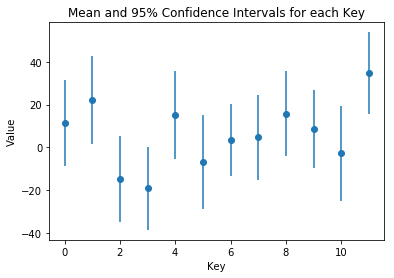

In [53]:
plt.errorbar(d['key'], d['mean'], xerr=0, yerr=1.96*d['sd'], fmt='o')
plt.title('Mean and 95% Confidence Intervals for each Key')
plt.ylabel('Value')
plt.xlabel('Key')
plt.show()

# Problem 3: Graph Processing: Counting Triangles with `PySpark`
**Problem 1:** We wrote a script to complete this task which is called `spoonert.hw9.3.py` and is attached to this submission.

**Problem 2:** We tested our script on the 5 simple files in the HDFS directory and outputted the results in `small_triangle_list.txt` which is attached.

To run the job we ran it on spark using the following command

Then to get the files into one text file by:

In [1]:
tris = []
with open("small_triangle_list.txt") as f:
    for line in f:
        tris.append(line.strip('\n'))

In [2]:
tris

['100 200 217',
 '100 200 300',
 '100 200 400',
 '100 300 400',
 '200 300 400',
 '300 400 500']

We see that there are 6 friendship triangles in the small dataset example.

**Problem 3:** We now use the script on the much bigger friend list. It list a bunch of popular people with so many friends! To run our script we use:

Then we put all the files into one large text file.

And we used the scp command to copy it to my local machine. The script is attached in the submission.

In [1]:
tris = []
with open("big_triangle_list.txt") as f:
    for line in f:
        tris.append(line.strip('\n'))

In [2]:
len(tris)

144120

There are 144,120 triangles in the big dataeset.

In [9]:
tris[0:10]

['0 7 74',
 '0 7 193',
 '0 7 283',
 '0 7 332',
 '0 7 483',
 '0 7 602',
 '0 7 692',
 '0 11 42',
 '0 11 82',
 '0 11 127']